# Source rate calculations

## import stuff

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm,ticker,colors,rc,font_manager
import numpy as np
import os

try:
    fm = font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v300.json"))
except FileNotFoundError:
    fm = font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))
fm.findfont("serif", rebuild_if_missing=False)
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

plt.rcParams.update({'font.size': 12})
#import seaborn as sns
#sns.set()
#sns.set_style("ticks")

# 8-photon rates
## Plot 8-photon hourly rate as function of Singles [Hz] and C/S

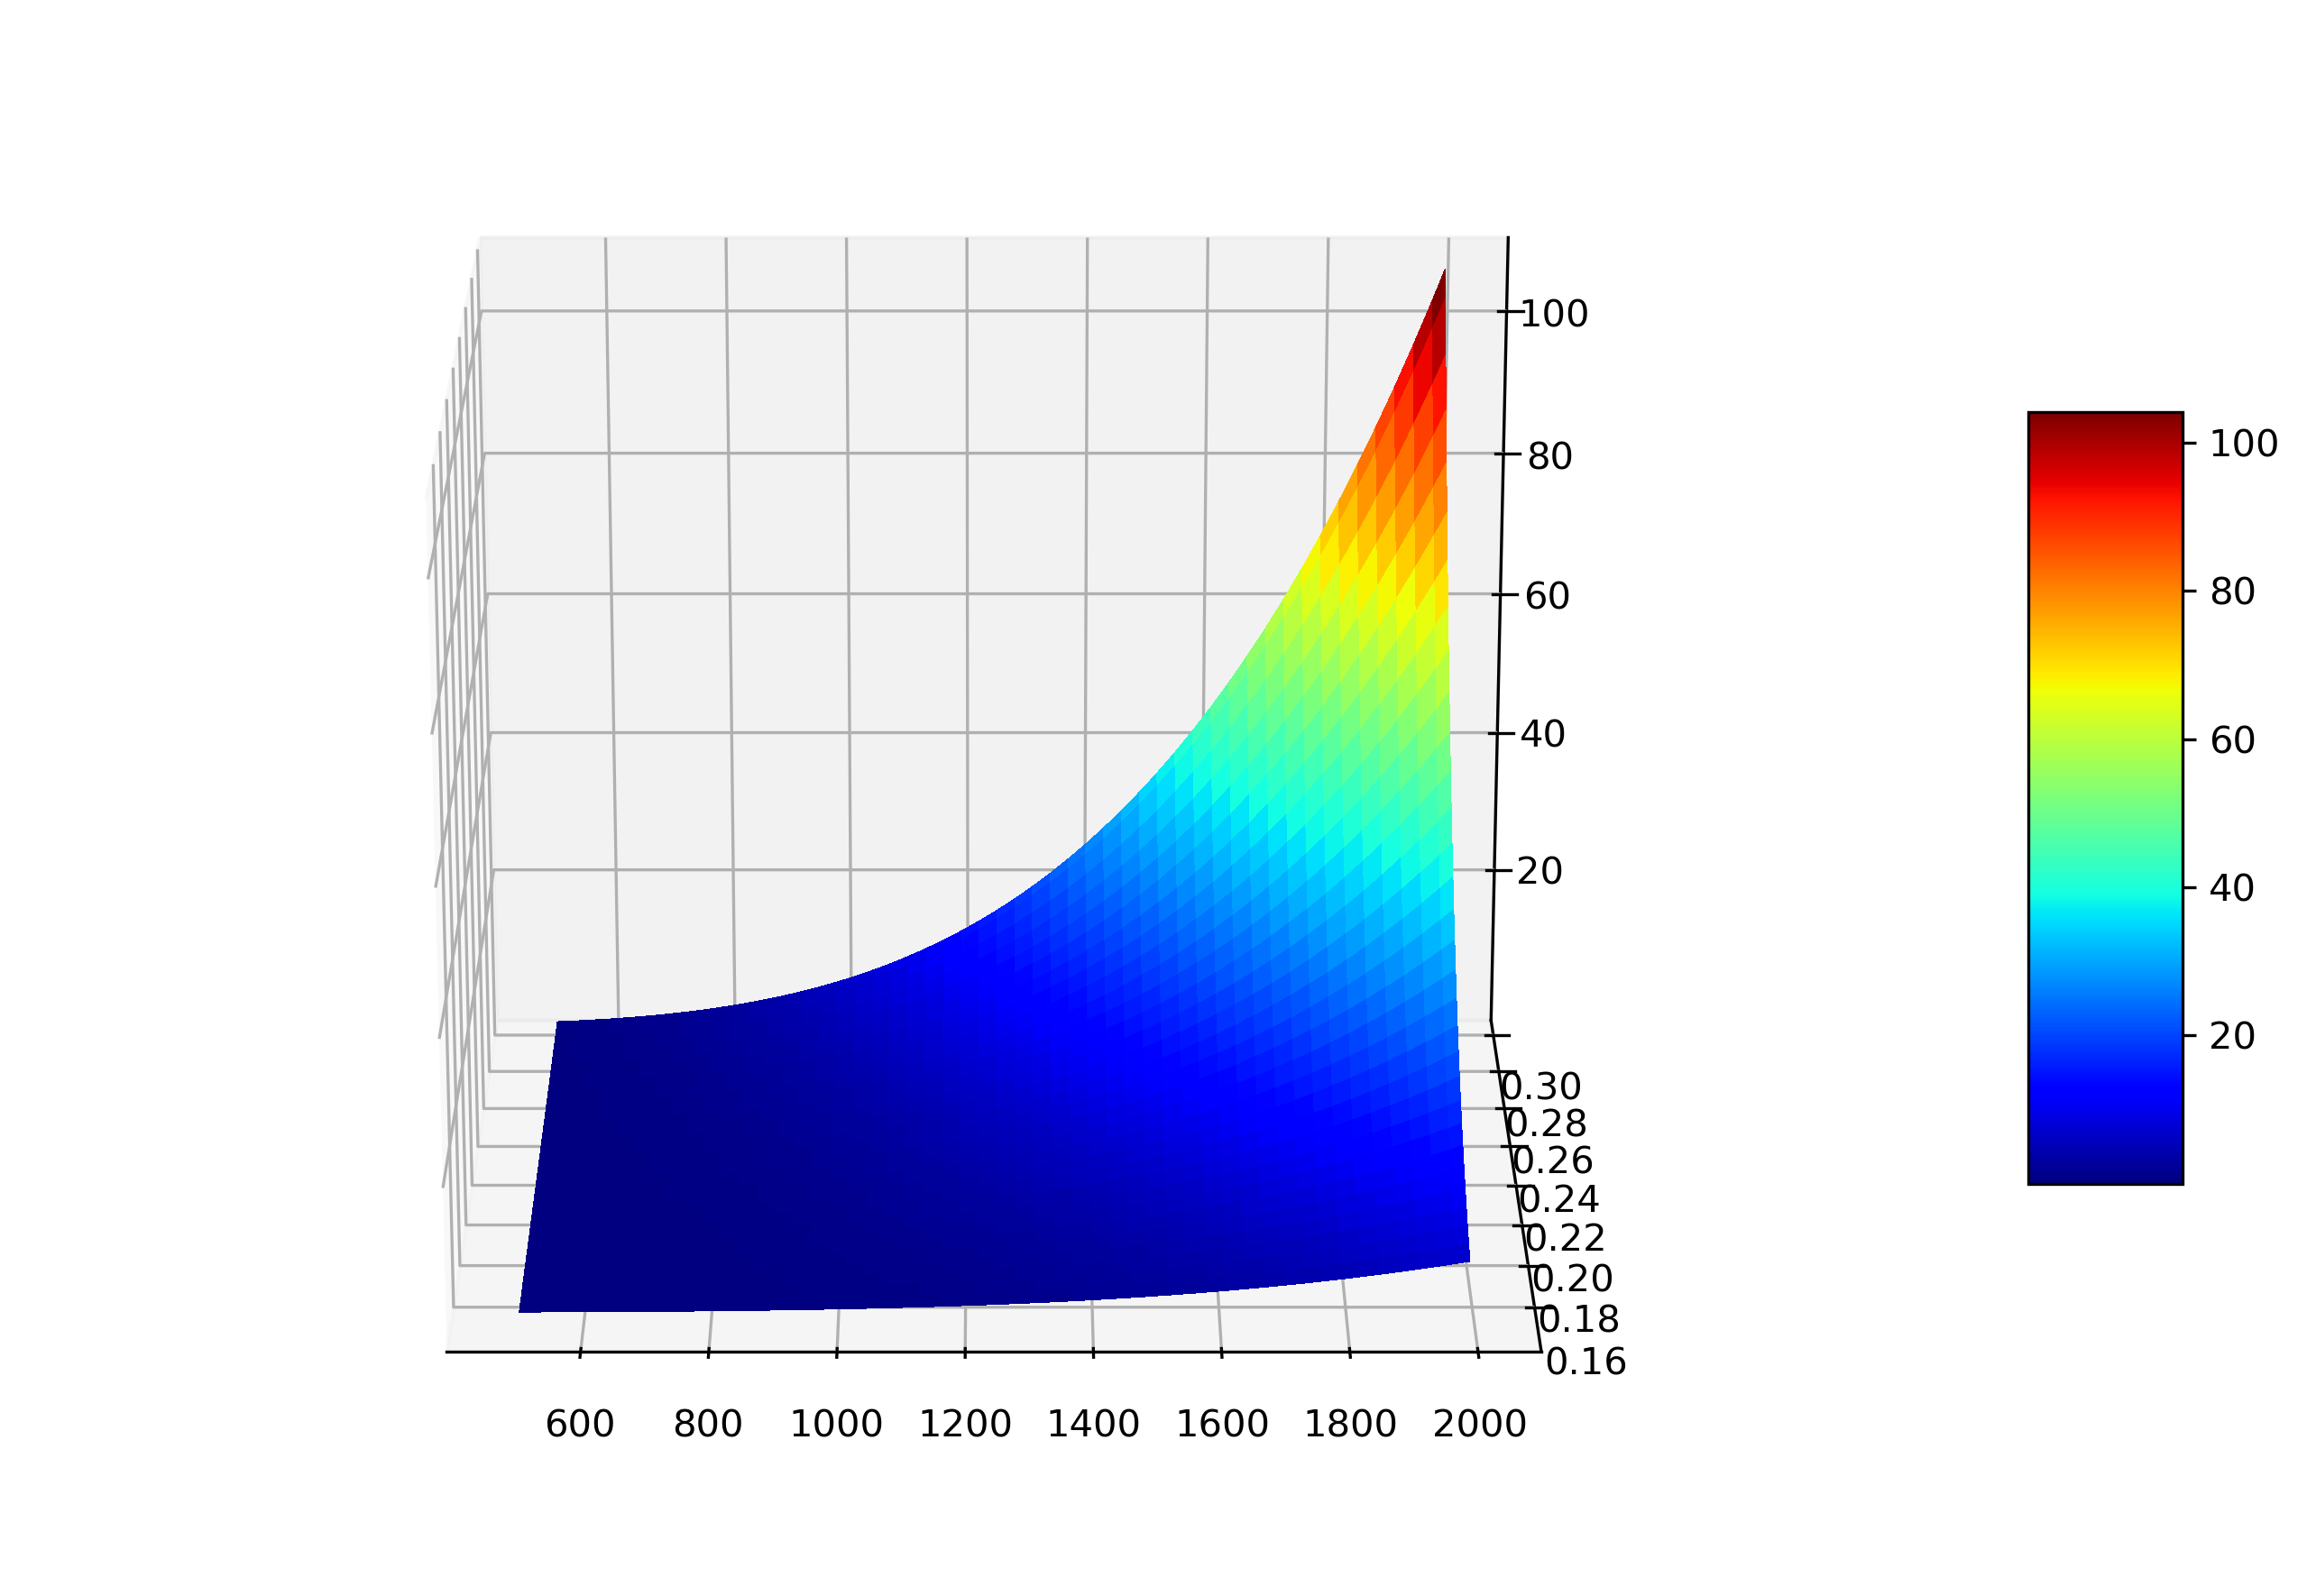

In [3]:
fig = plt.figure(figsize=(9, 6), dpi=300)
ax = fig.gca(projection='3d')

# Make data
# Singles
X = np.arange(500, 2000, 10)

# C/S ratio
Y = np.arange(0.15, 0.30, 0.0025)

X, Y = np.meshgrid(X, Y)

# 8-photon rate per hour
Z = (X*1000*Y)**4/(8*(80000000**3))*3600
Z = Z.astype(float) #for log scale

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)
#surf = ax.plot_surface(X, Y, np.log10(Z), cmap=cm.jet, linewidth=2, antialiased=False) #for log scale

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
#ax.set_zscale('log')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#plt.xticks(rotation=40, ha='right')



# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
#fig.colorbar()

plt.tight_layout()
#plt.gcf().subplots_adjust(bottom=0.15)
ax.view_init(20, -90)
plt.show()

## Plot 8-photon hourly rate as function of Singles [Hz] and C/S, this time as a heatmap

CPU times: user 28.1 s, sys: 3.18 s, total: 31.2 s
Wall time: 2min 35s


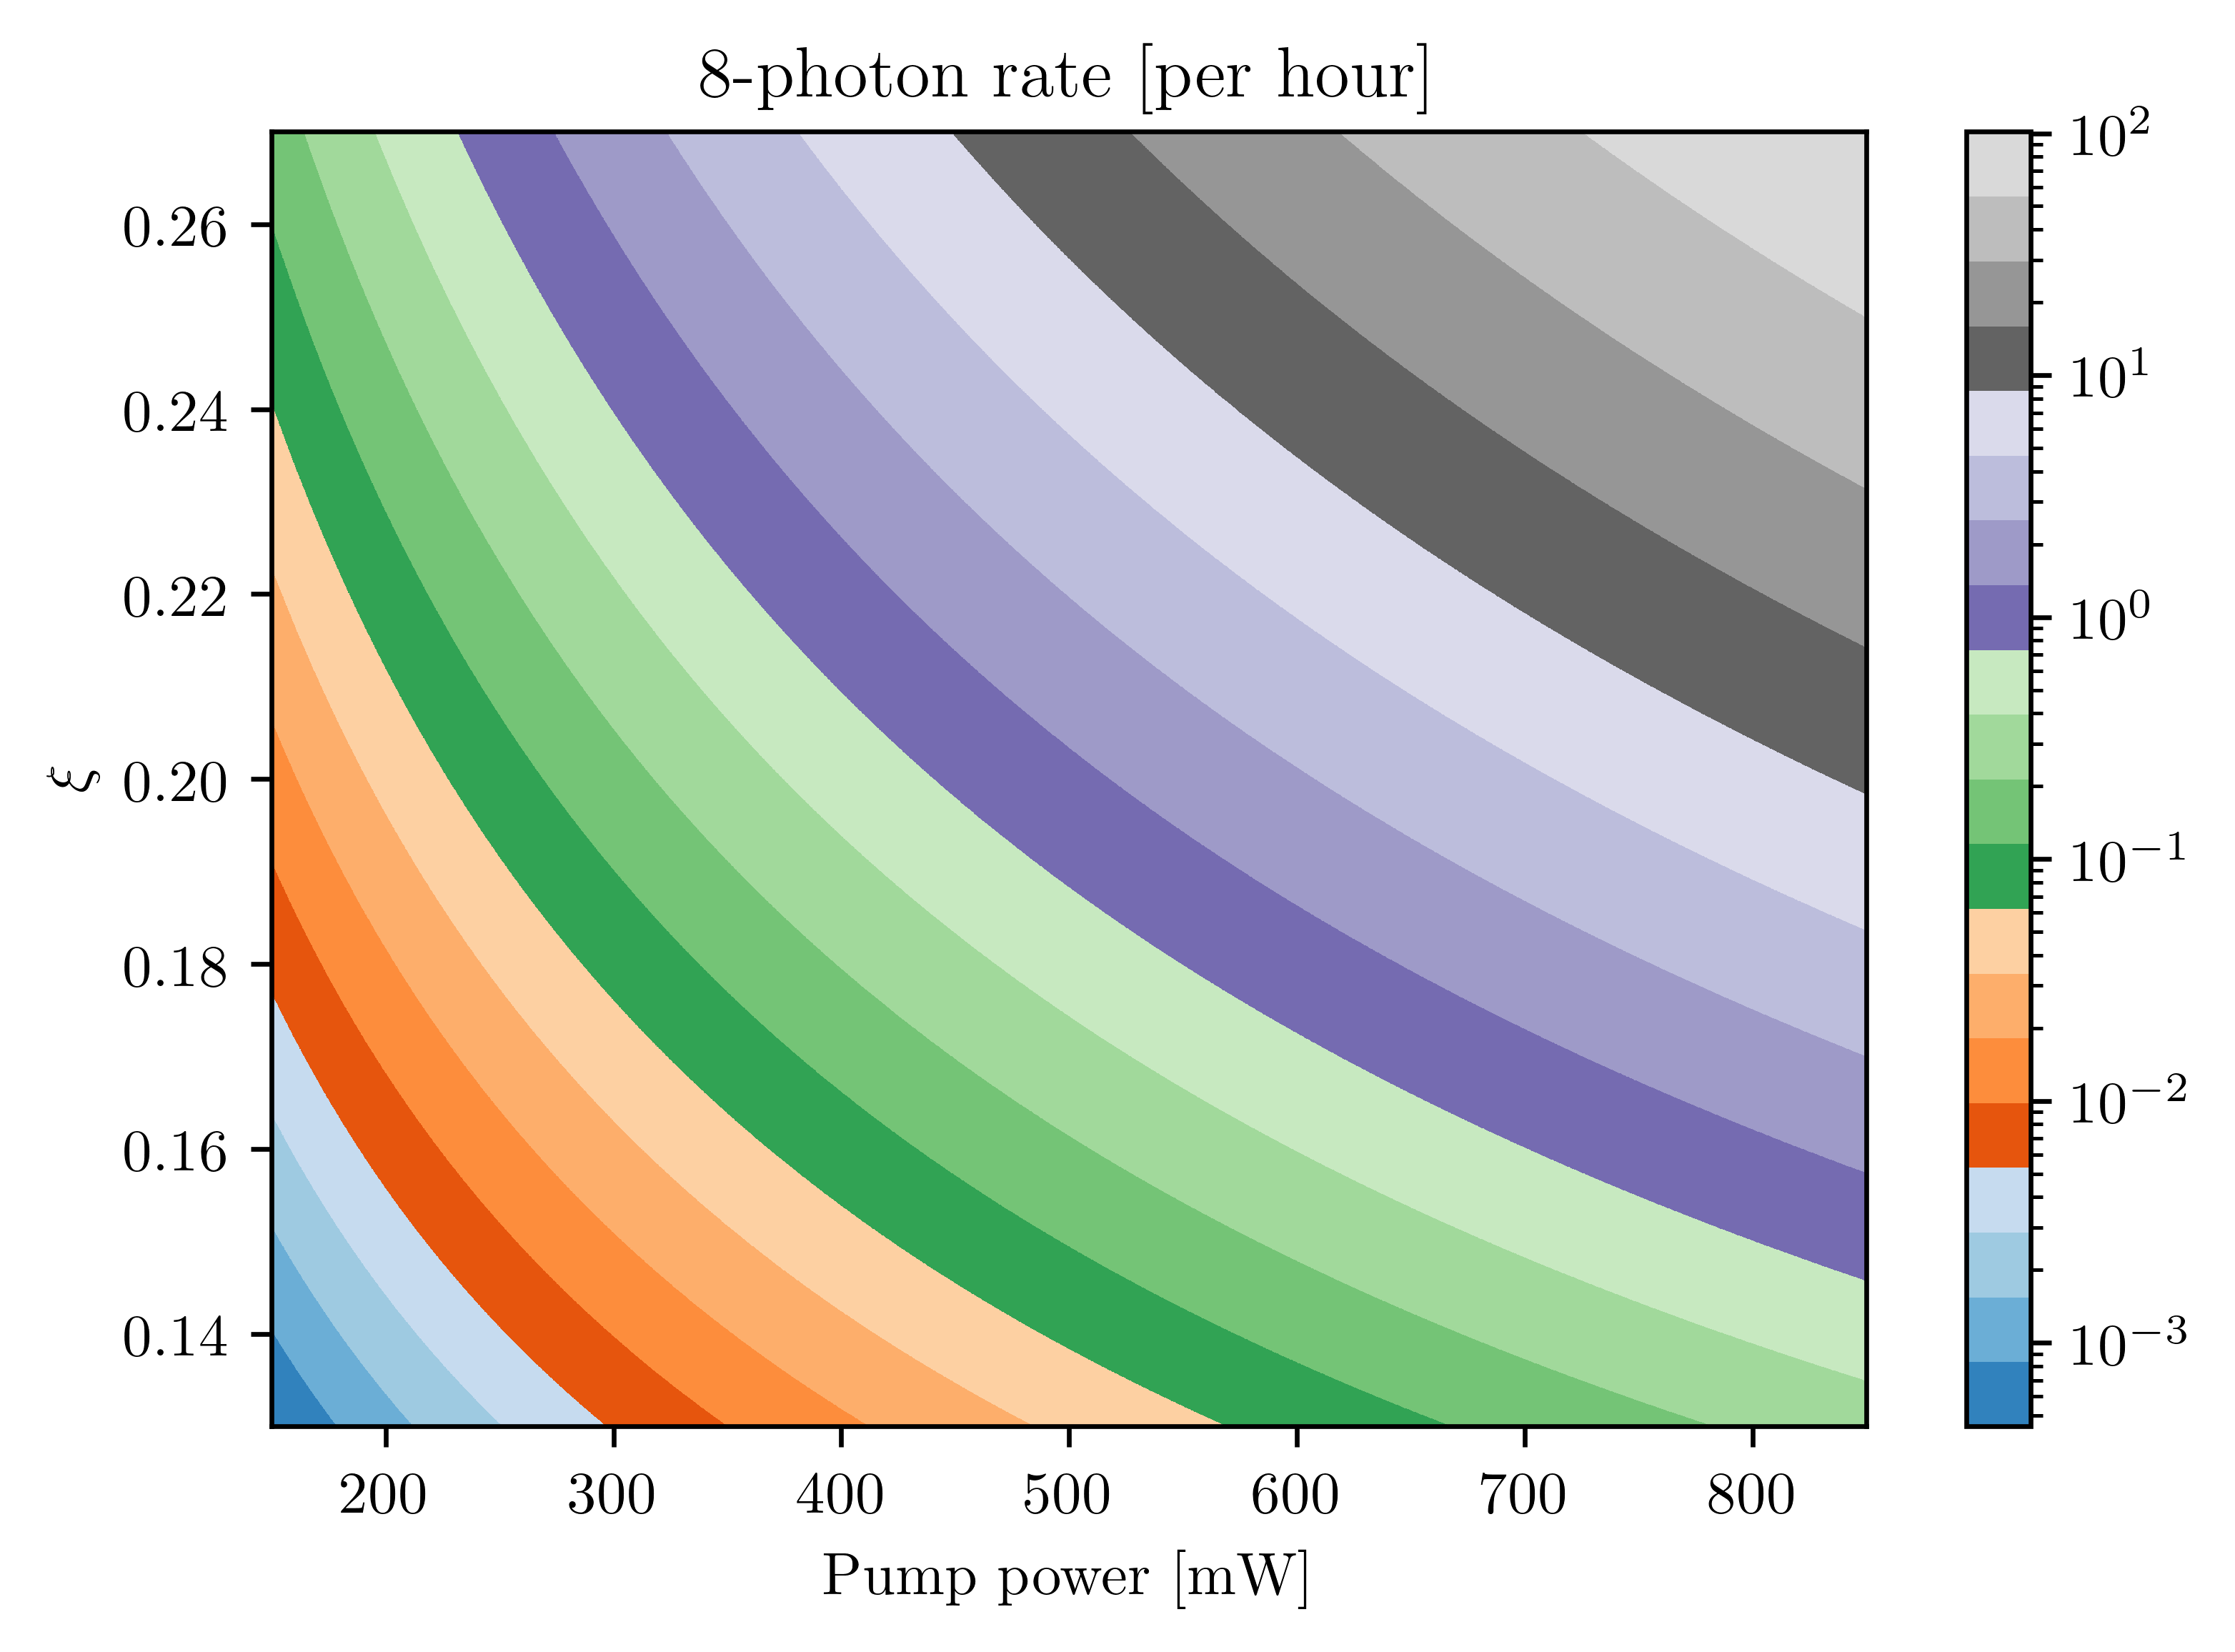

In [10]:
%%time
fig, ax = plt.subplots(1, 1, dpi=600)

# Make data
# Power [mW]
steps = 4000
X = np.linspace(150, 850, steps)

# C/S ratio
Y = np.linspace(0.13, 0.27, steps)

X, Y = np.meshgrid(X, Y)

# 8-photon rate per hour
# R_P as function of power. Fit params are taken from file 'dip_vis_vs_power.ipynb'
Z = ((X*0.00011459+0.00260626)**4*Y**8/8*80000000)*3600
#Z = Z.astype(float) #for log scale
plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(), cmap=cm.tab20c)
plt.colorbar()

plt.title('8-photon rate [per hour]')
plt.xlabel('Pump power [mW]')
plt.ylabel(r'$\xi$')

#plt.show()
fig.savefig("8_ph_rate_vs_power_xi.png", format='png', bbox_inches='tight')

## Plot n-photon rates as function of Coincidences [kHz]

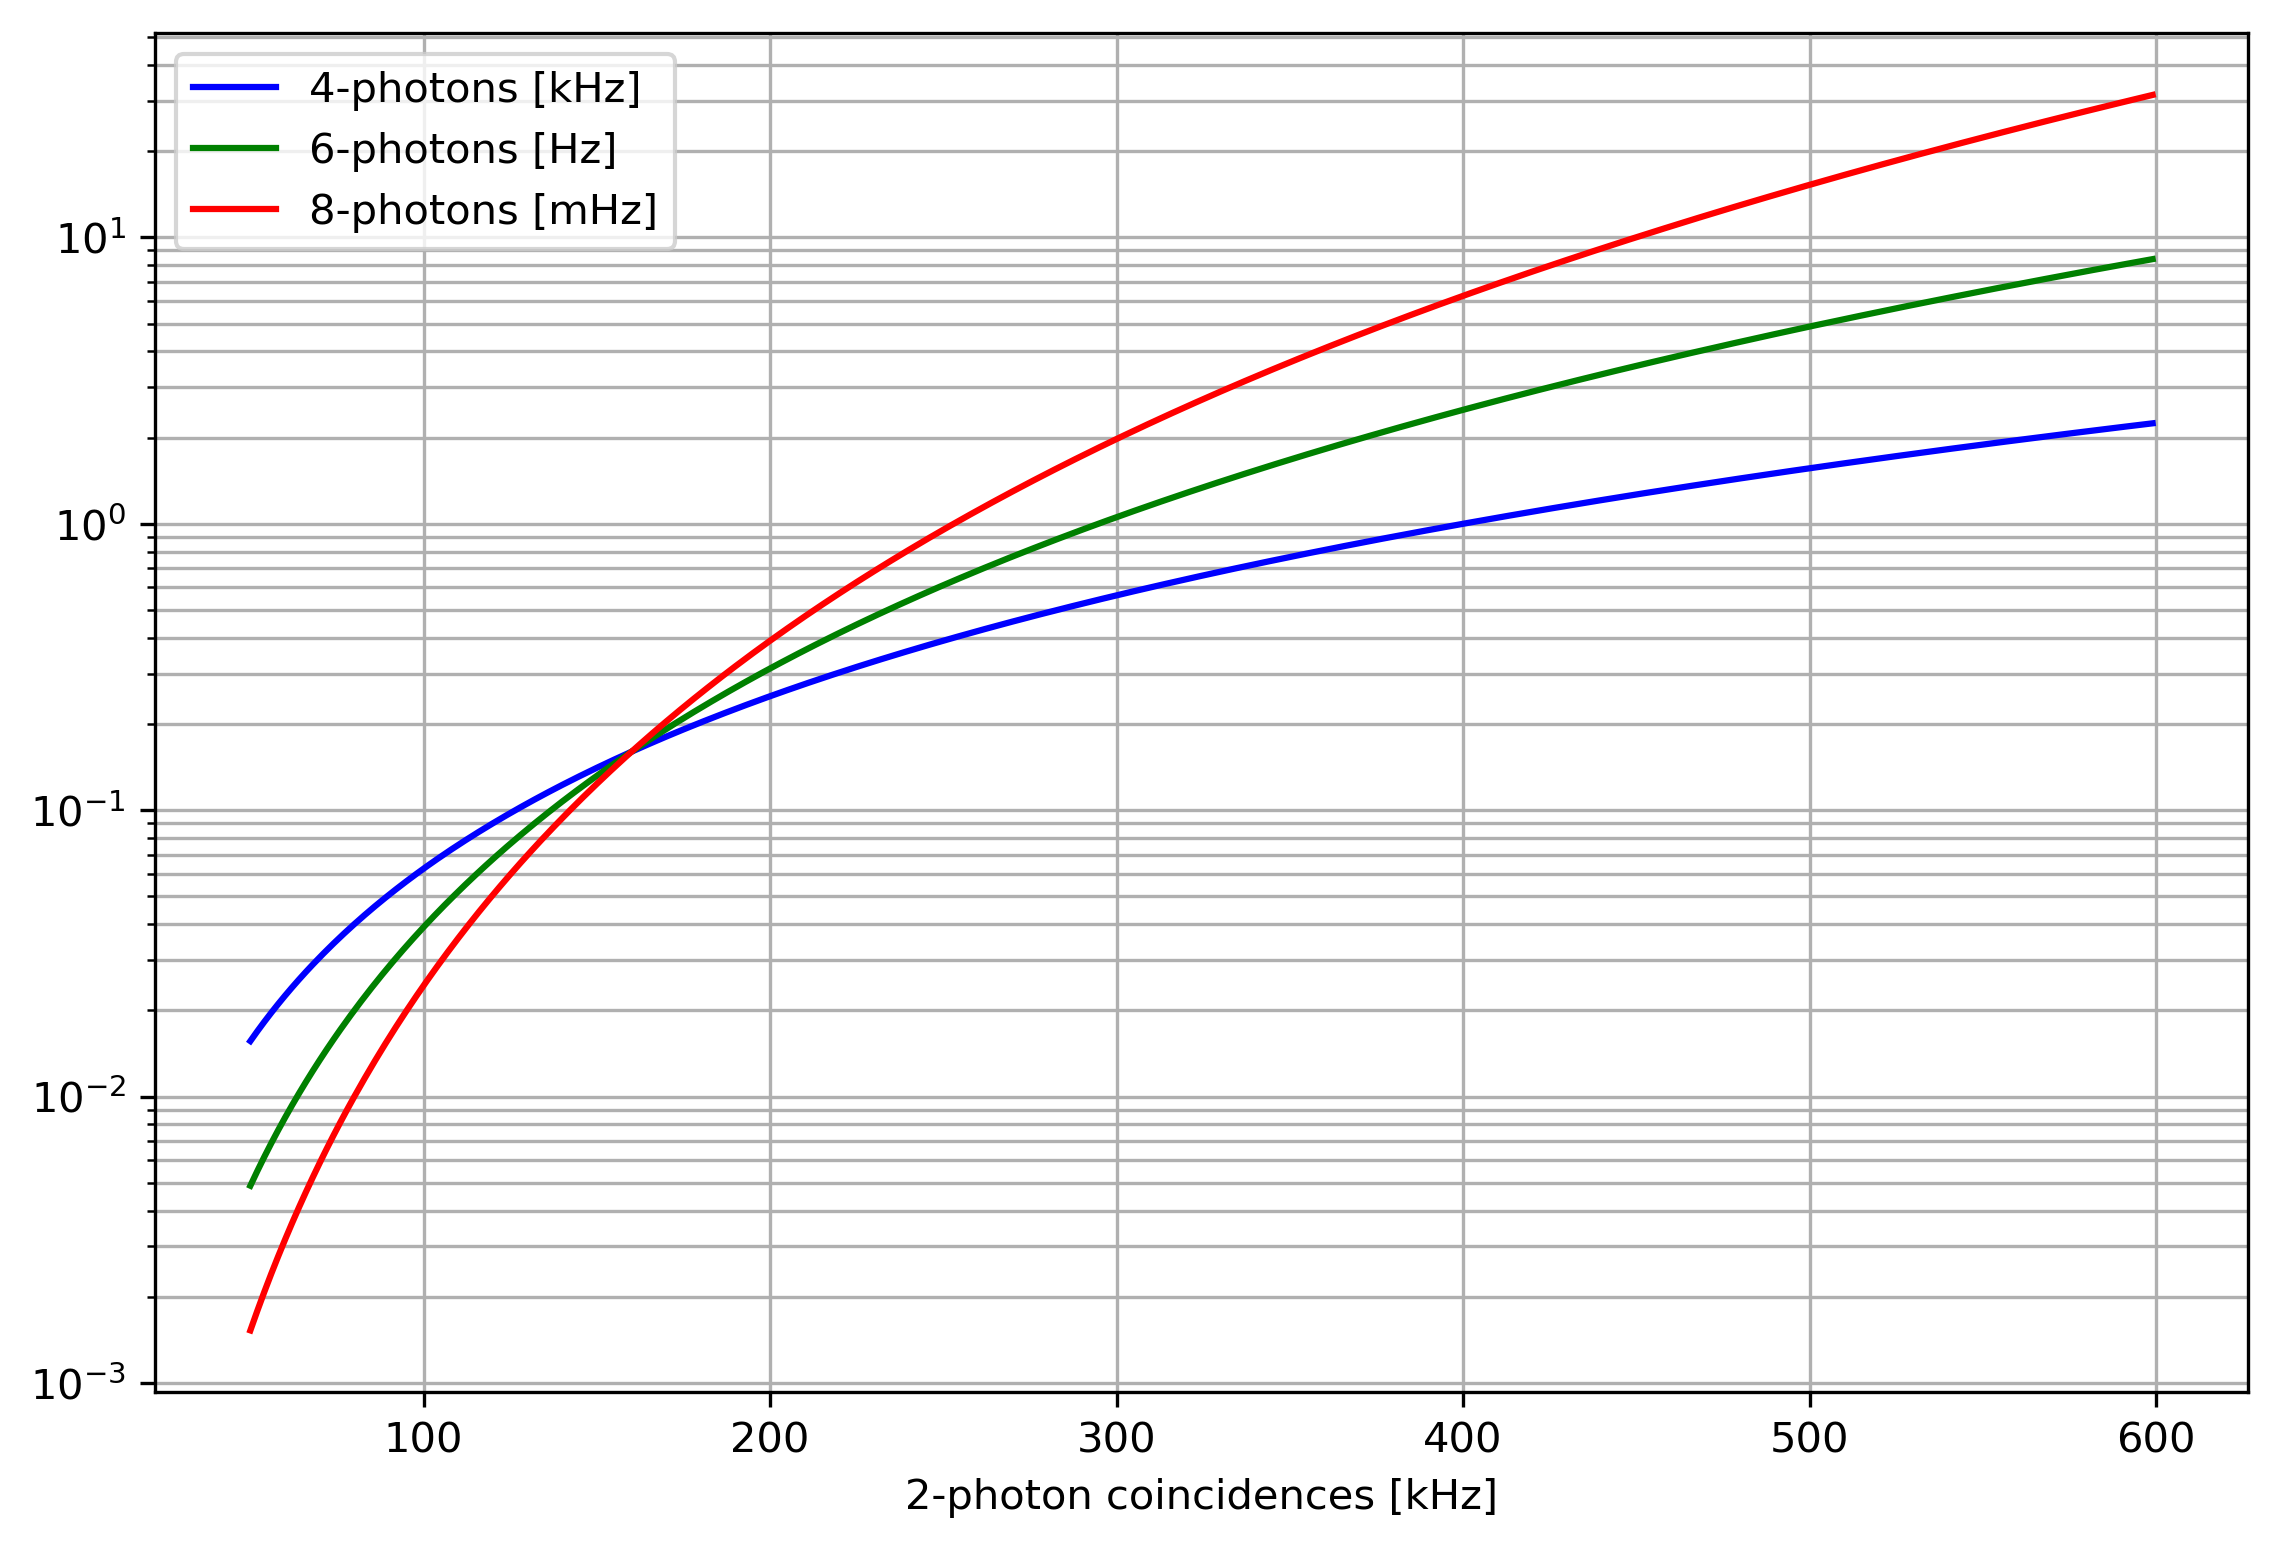

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm,ticker,colors
import numpy as np

#sns.set_style("dark")

fig1 = plt.figure(figsize=(9, 6), dpi=300)
ax1 = fig1.add_subplot(111)

# Make data
# Coincidences
num = 1
coincs = np.arange(50, 600, num, dtype='float')

# 4-photon rate
fourP = (coincs*1000)**2/(2*(80000000))/1000

# 6-photon rate
sixP = (coincs*1000)**3/(4*(80000000**2))

# 8-photon rate per hour
eightP = (coincs*1000)**4/(8*(80000000**3))*1000

ax1.plot(coincs, fourP, 'b', label='4-photons [kHz]')
ax1.plot(coincs, sixP, 'g', label='6-photons [Hz]')
ax1.plot(coincs, eightP, 'r', label='8-photons [mHz]')

ax1.grid(which='both')
plt.tick_params(axis='y', which='minor')
plt.tick_params(axis='x', which='minor')
plt.xlabel('2-photon coincidences [kHz]')
#plt.ylabel('8-photon coincidences [per hour]')

plt.yscale('log')
plt.legend()
plt.show()

#fig1.savefig("8_photon_rate_coincidences.png", format='png', bbox_inches='tight')

## Plot $\phi^+$  visibility as function of Singles [Hz] and C/S

Text(0, 0.5, 'C/S ratio')

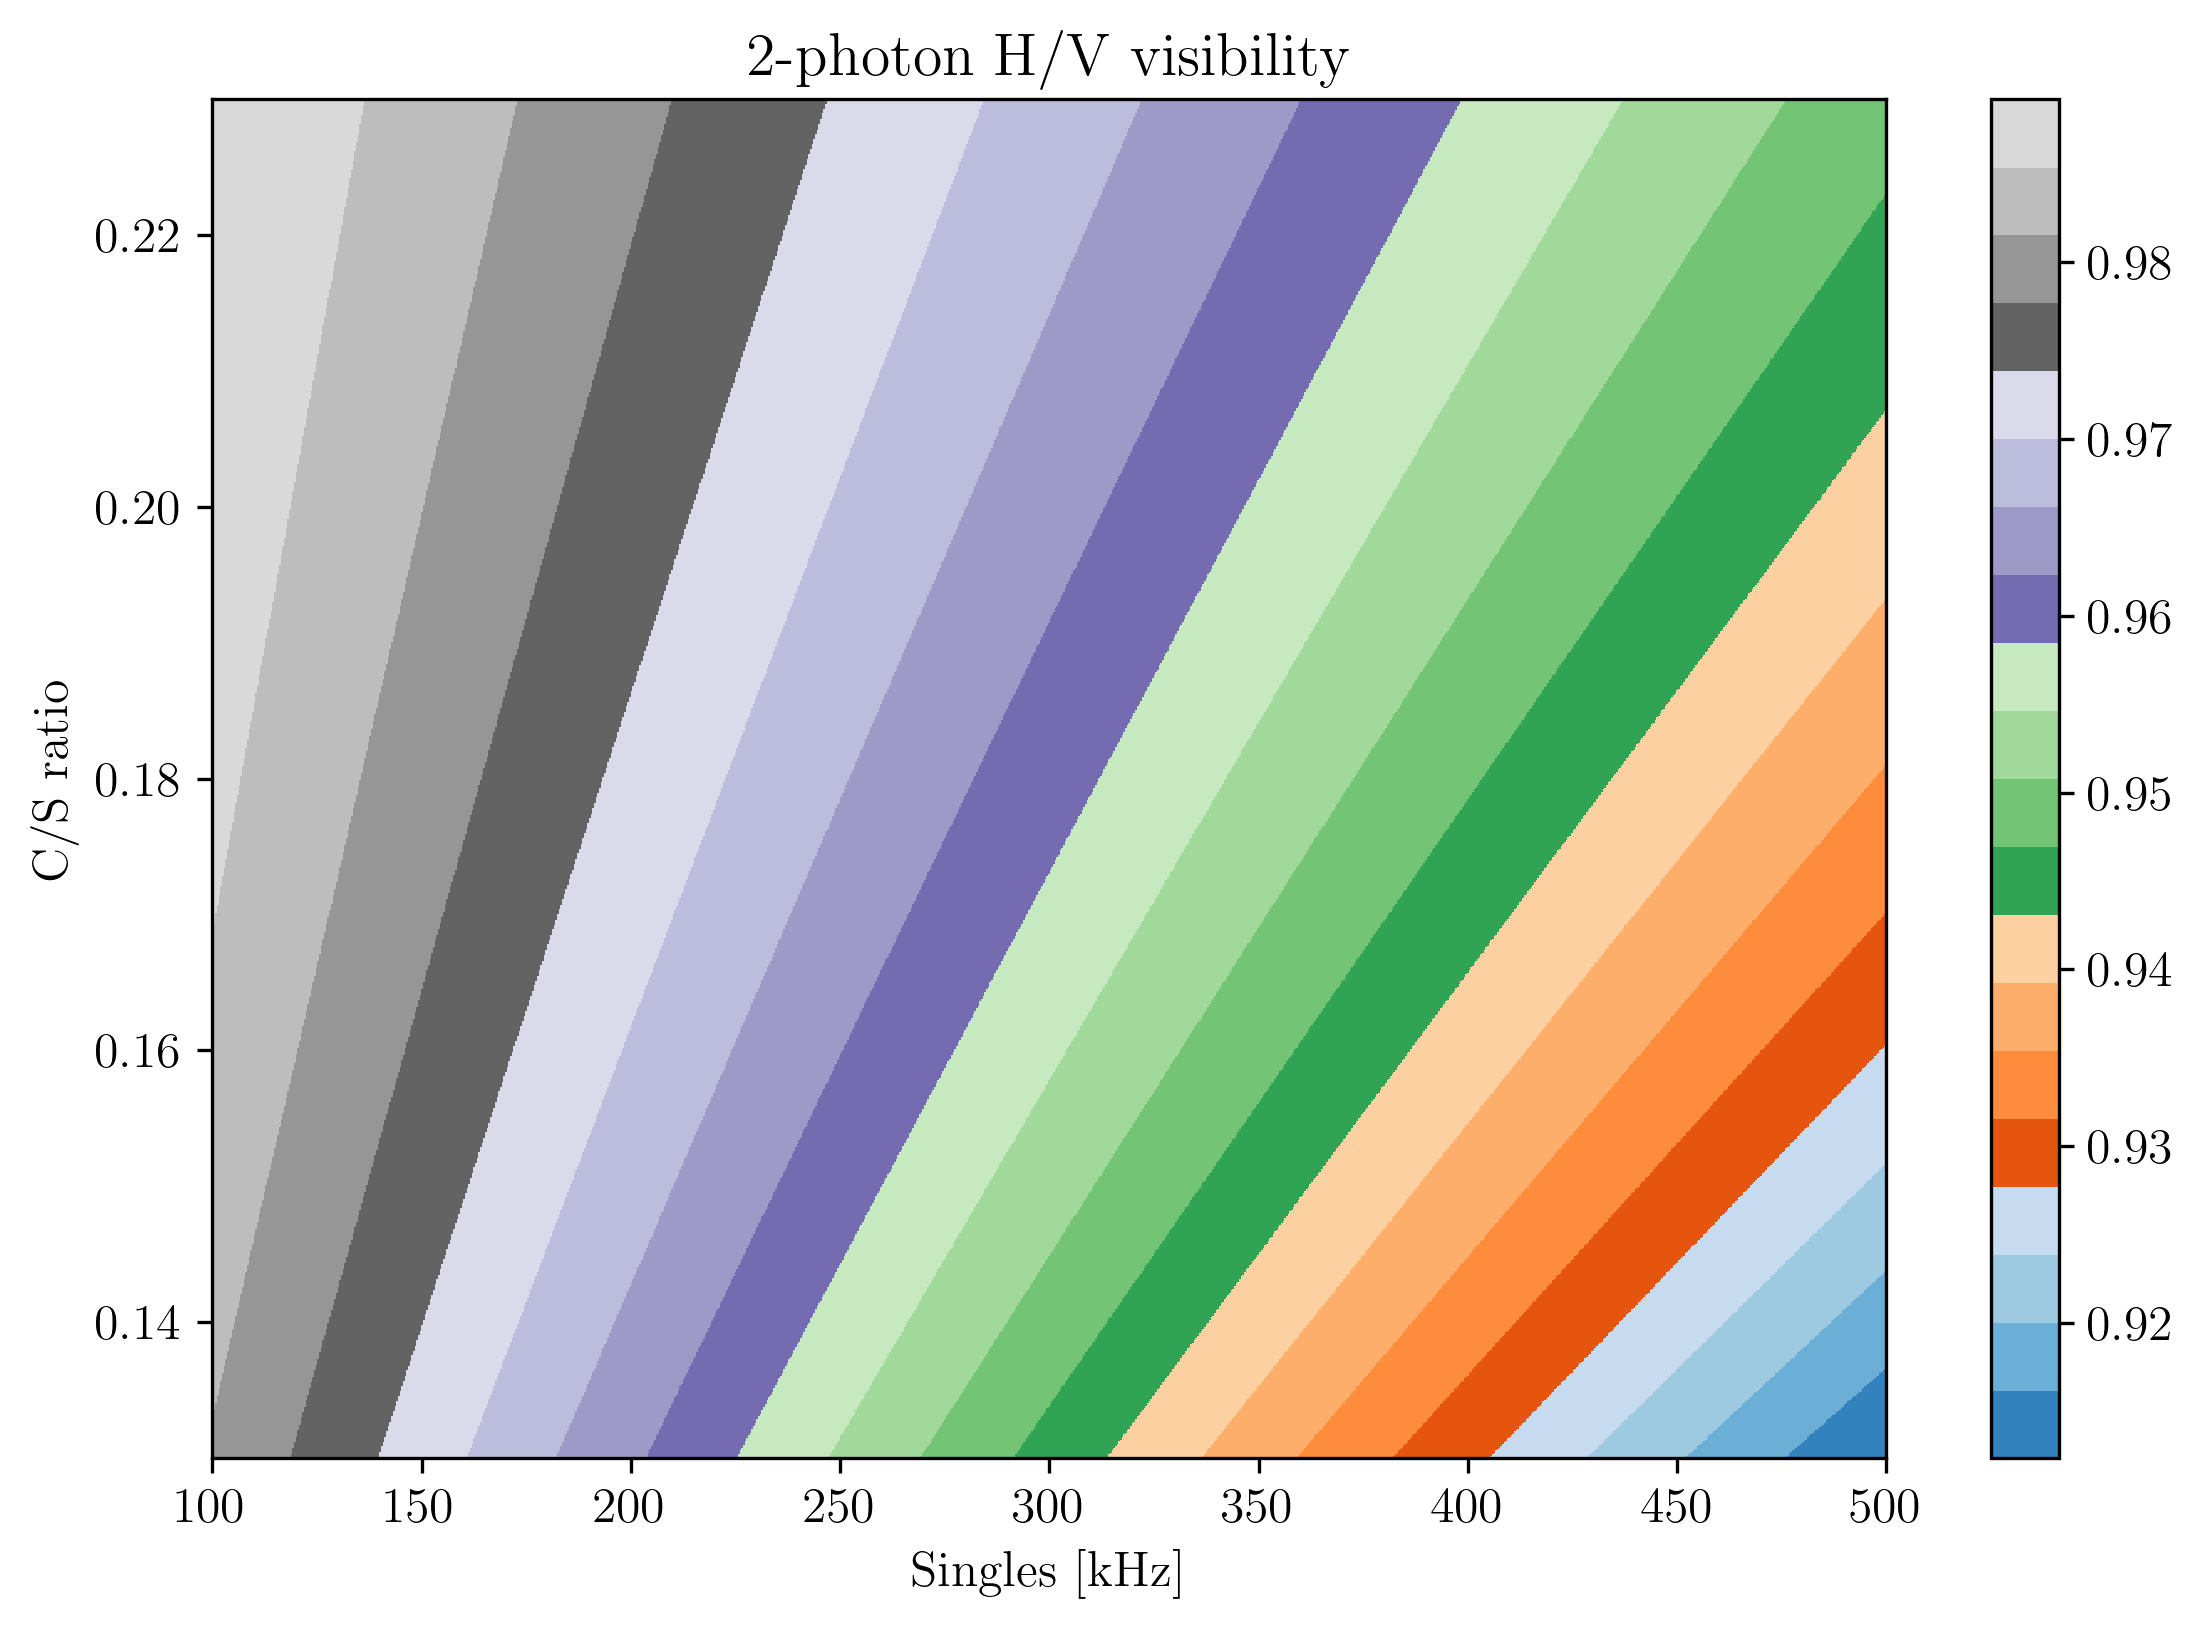

In [7]:
fig3 = plt.figure(figsize=(9, 6), dpi=300)
#fig3 = plt.figure()
ax3 = fig3.add_subplot(111)

# Make data
steps = 1000
# Singles
X = np.linspace(100, 500, steps)

# C/S ratio
Y = np.linspace(0.13, 0.23, steps)

X, Y = np.meshgrid(X, Y)

R = 8e7 # laser repetition rate
dT = 3.33e-9

P = X*1000/R/Y
#P = (np.sqrt(4*X*1000/R/Y + 1) - 1)/2 # single down-conversion probability
#P = (-Y+np.sqrt(4000*Y*X*(1-Y)/R+Y**2))/(2*Y*(1-Y)) # single down-conversion probability

# 2-photon H/V visibility
#Z1 = (1 + 3*P-4*P**2)/(1 + P*(5-2*Y**2+4*Y)-4*P**2) #from ab-initio calcs
#Z1 = (1 - P**2)/(1 - P**2 + (P*(1-Y)**2)/2) #from ab-initio calcs
Z = 1/(1+2*X*1000/(Y*R)) #from standard formula
#Z = Z.astype(float) #for log scale
plt.pcolormesh(X, Y, Z,  cmap=cm.tab20c)
plt.colorbar()

plt.title('2-photon H/V visibility')
plt.xlabel('Singles [kHz]')
plt.ylabel('C/S ratio')

#plt.show()
#fig3.savefig("8_photon_rate_singles_CtoS_ratio.png", format='png', bbox_inches='tight')

## Plot $\phi^+$  visibility as function of Pump power [mW] and $\xi$

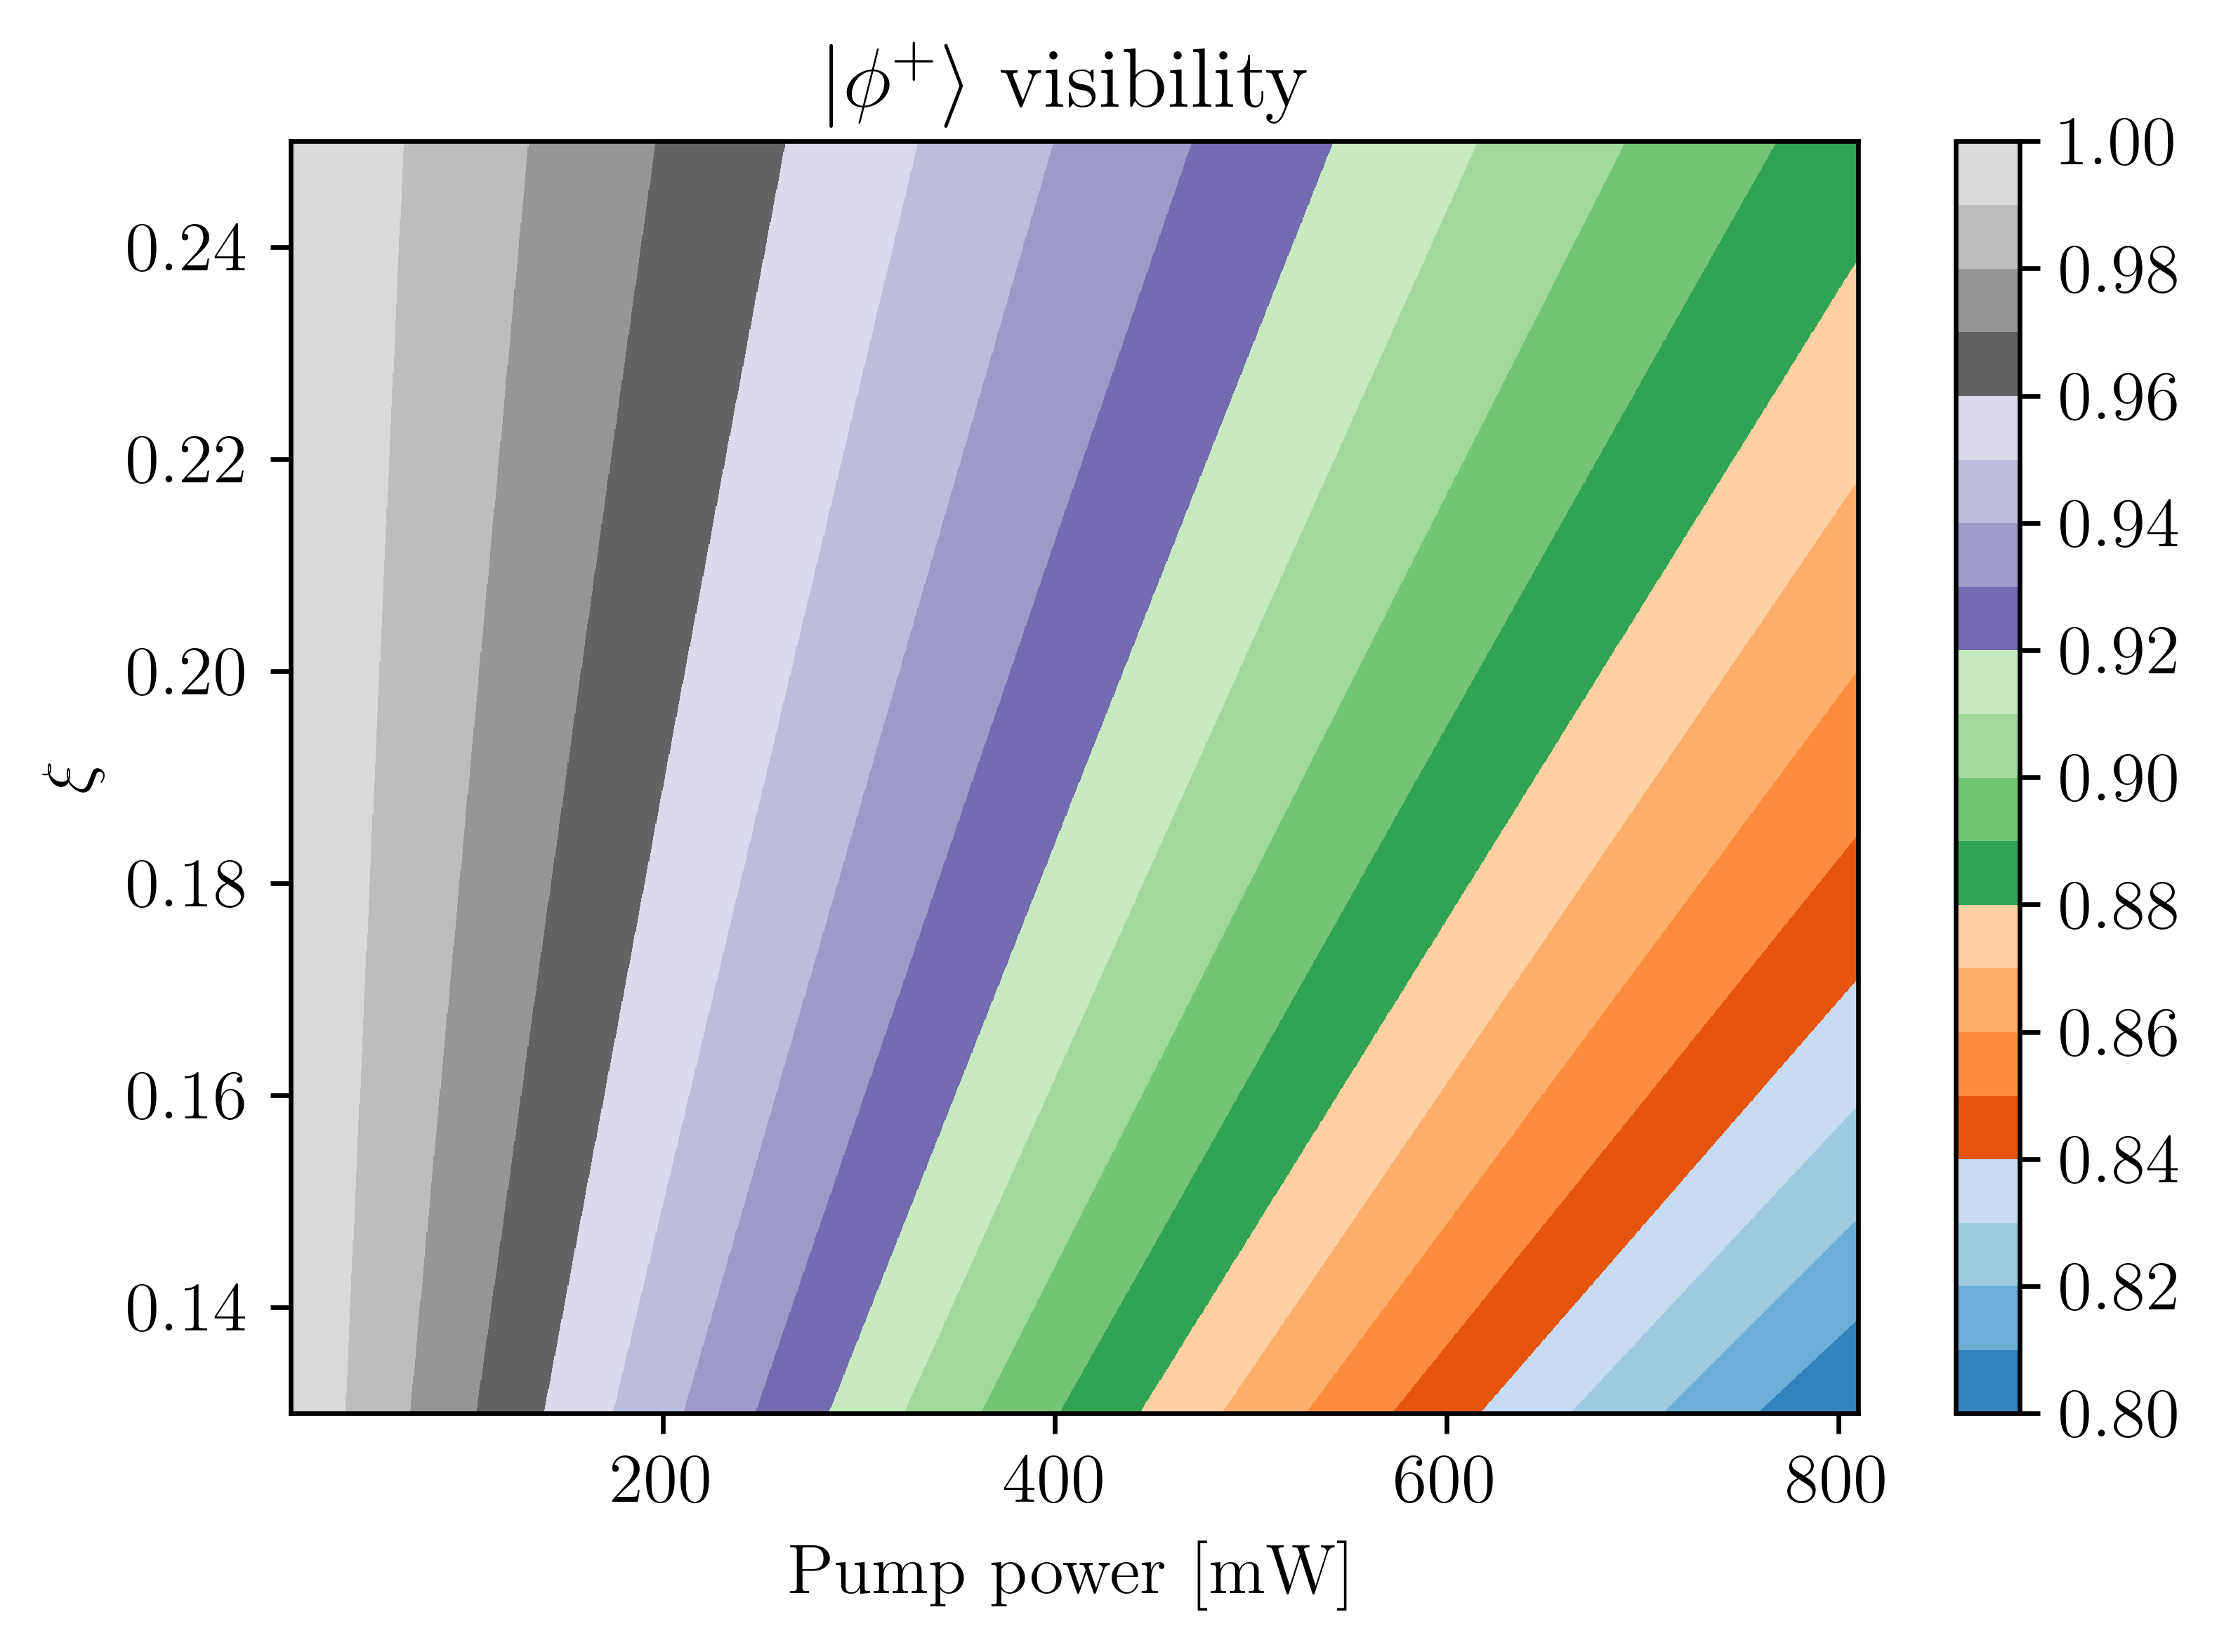

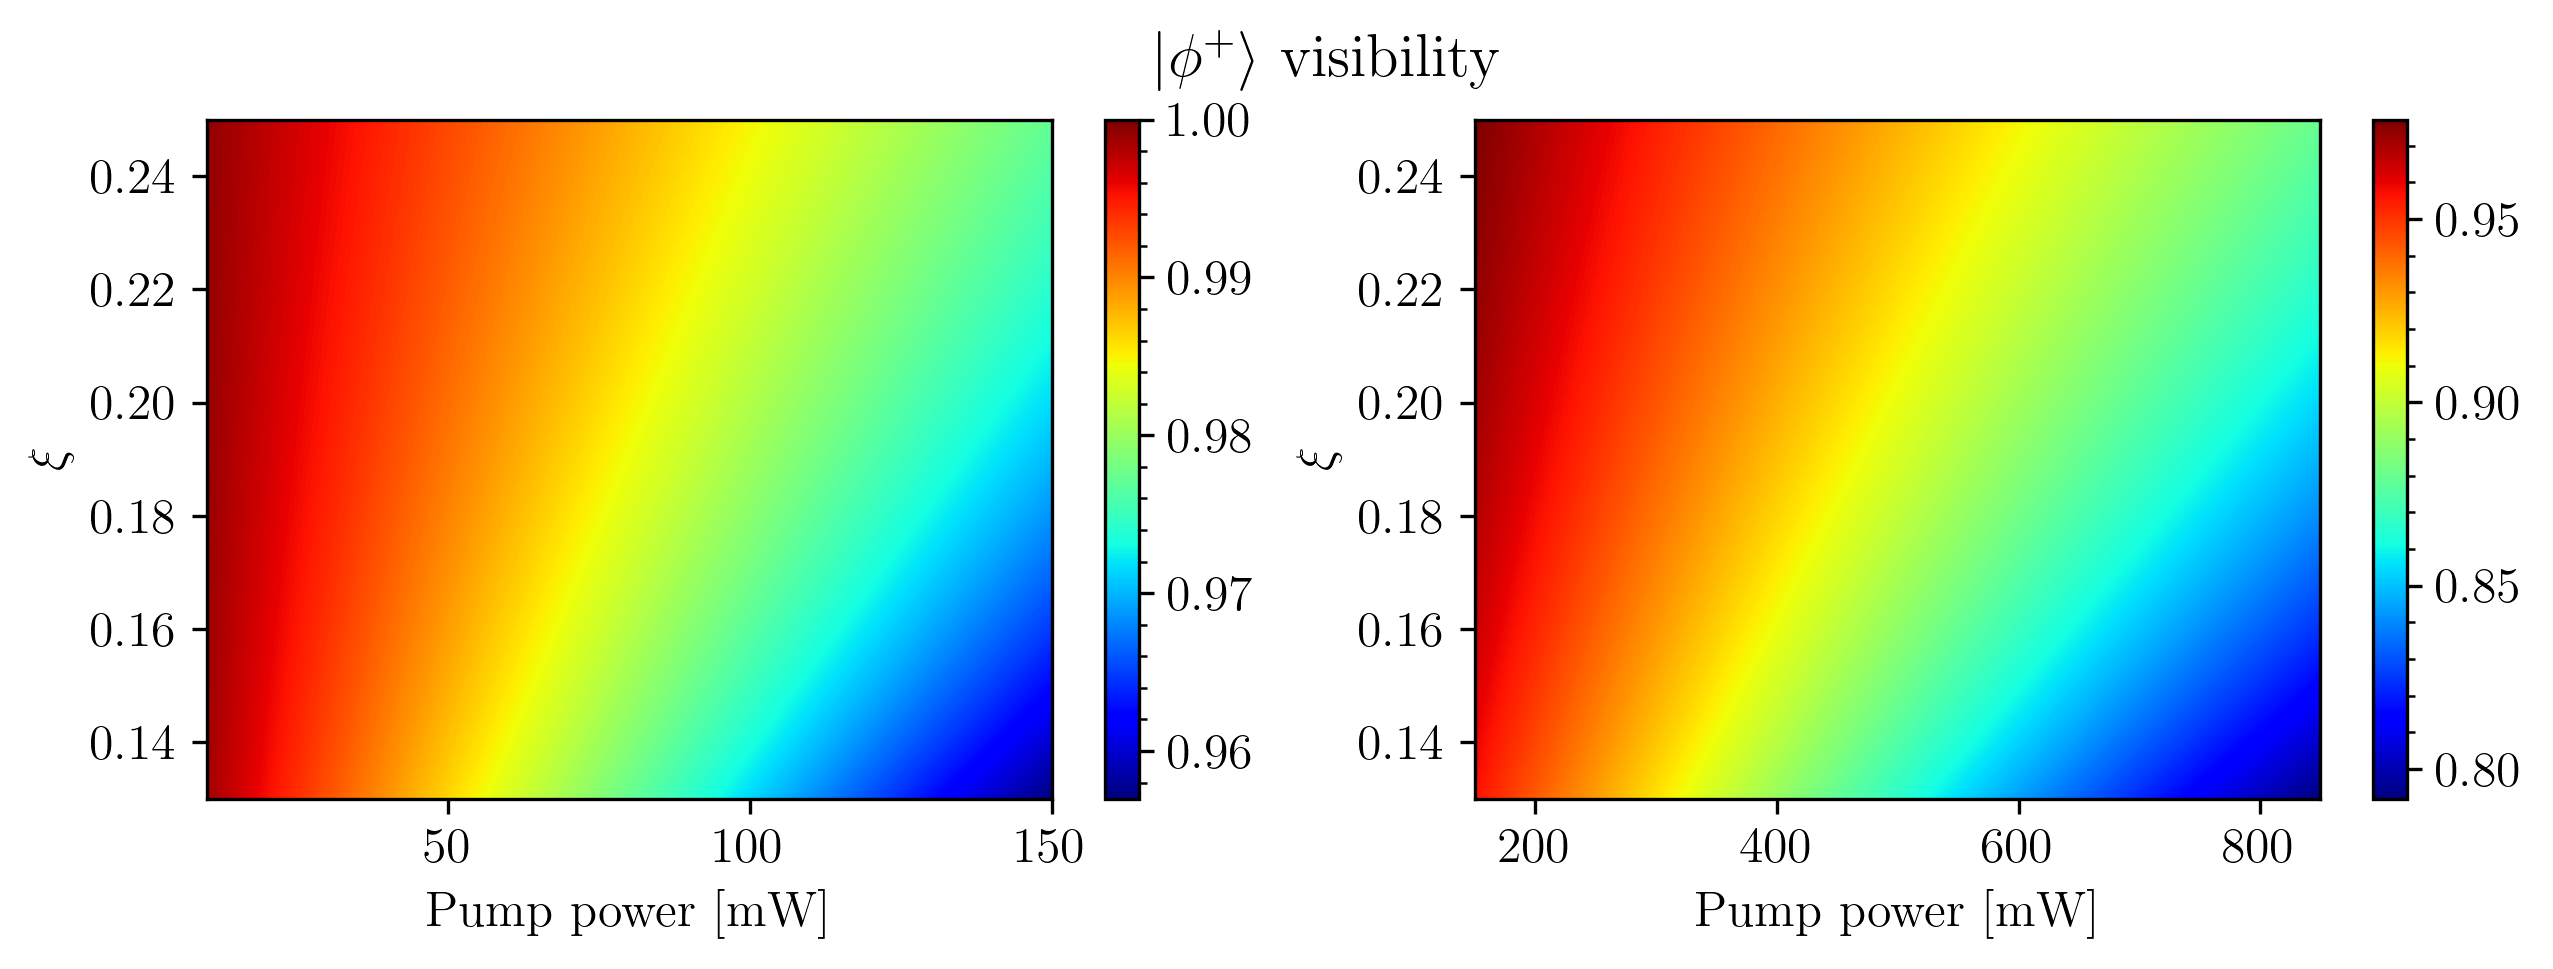

In [3]:
fig1, ax1 = plt.subplots(1, 1, dpi=600)
fig, ax = plt.subplots(1, 2, figsize=(10, 3), dpi=300)

# Make data
steps = 2000

# SINGLE PLOT
# Power
X = np.linspace(10, 810, steps)

# C/S ratio
Y = np.linspace(0.13, 0.25, steps)

X, Y = np.meshgrid(X, Y)

R = 8e7 # laser repetition rate

# 2-photon H/V visibility
Z = 1/(1+1*(3.23928448*X - 17.8127067)*1000/(Y*R)) #from standard formula

single = ax1.pcolormesh(X, Y, Z,  cmap=cm.tab20c, vmin=.8, vmax=1)
cbar = plt.colorbar(single, ax=ax1, ticks=[1,.98,.96,.94,.92,.9,.88,.86,.84,.82,.8])
cbar.minorticks_on()

ax1.set_title(r'$| \phi^+ \rangle$ visibility')
ax1.set_xlabel('Pump power [mW]')
ax1.set_ylabel(r'$\xi$')


# FIRST PLOT
# Power
X = np.linspace(10, 150, steps)

# C/S ratio
Y = np.linspace(0.13, 0.25, steps)

X, Y = np.meshgrid(X, Y)

R = 8e7 # laser repetition rate

# 2-photon H/V visibility
Z = 1/(1+1*(3.23928448*X - 17.8127067)*1000/(Y*R)) #from standard formula

first = ax[0].pcolormesh(X, Y, Z,  cmap=cm.jet, vmax=1)
cbar = plt.colorbar(first, ax=ax[0])
cbar.minorticks_on()

#ax[0].set_title('2-photon H/V visibility')
ax[0].set_xlabel('Pump power [mW]')
ax[0].set_ylabel(r'$\xi$')

# SECOND PLOT
# Power
X = np.linspace(150, 850, steps)

# C/S ratio
Y = np.linspace(0.13, 0.25, steps)

X, Y = np.meshgrid(X, Y)

# 2-photon H/V visibility
Z = 1/(1+1*(3.23928448*X - 17.8127067)*1000/(Y*R)) #from standard formula

second = ax[1].pcolormesh(X, Y, Z,  cmap=cm.jet)
cbar = plt.colorbar(second, ax=ax[1])
cbar.minorticks_on()

#ax[1].set_title('2-photon H/V visibility')
ax[1].set_xlabel('Pump power [mW]')
ax[1].set_ylabel(r'$\xi$')

fig.suptitle(r'$| \phi^+ \rangle$ visibility')

#plt.show()
#fig1.savefig("2_ph_vis_vs_power_xi.png", format='png', bbox_inches='tight')
#fig.savefig("2_ph_vis_vs_power_xi.png", format='png', bbox_inches='tight')

## Plot different rates on same figure

AttributeError: 'float' object has no attribute 'view'

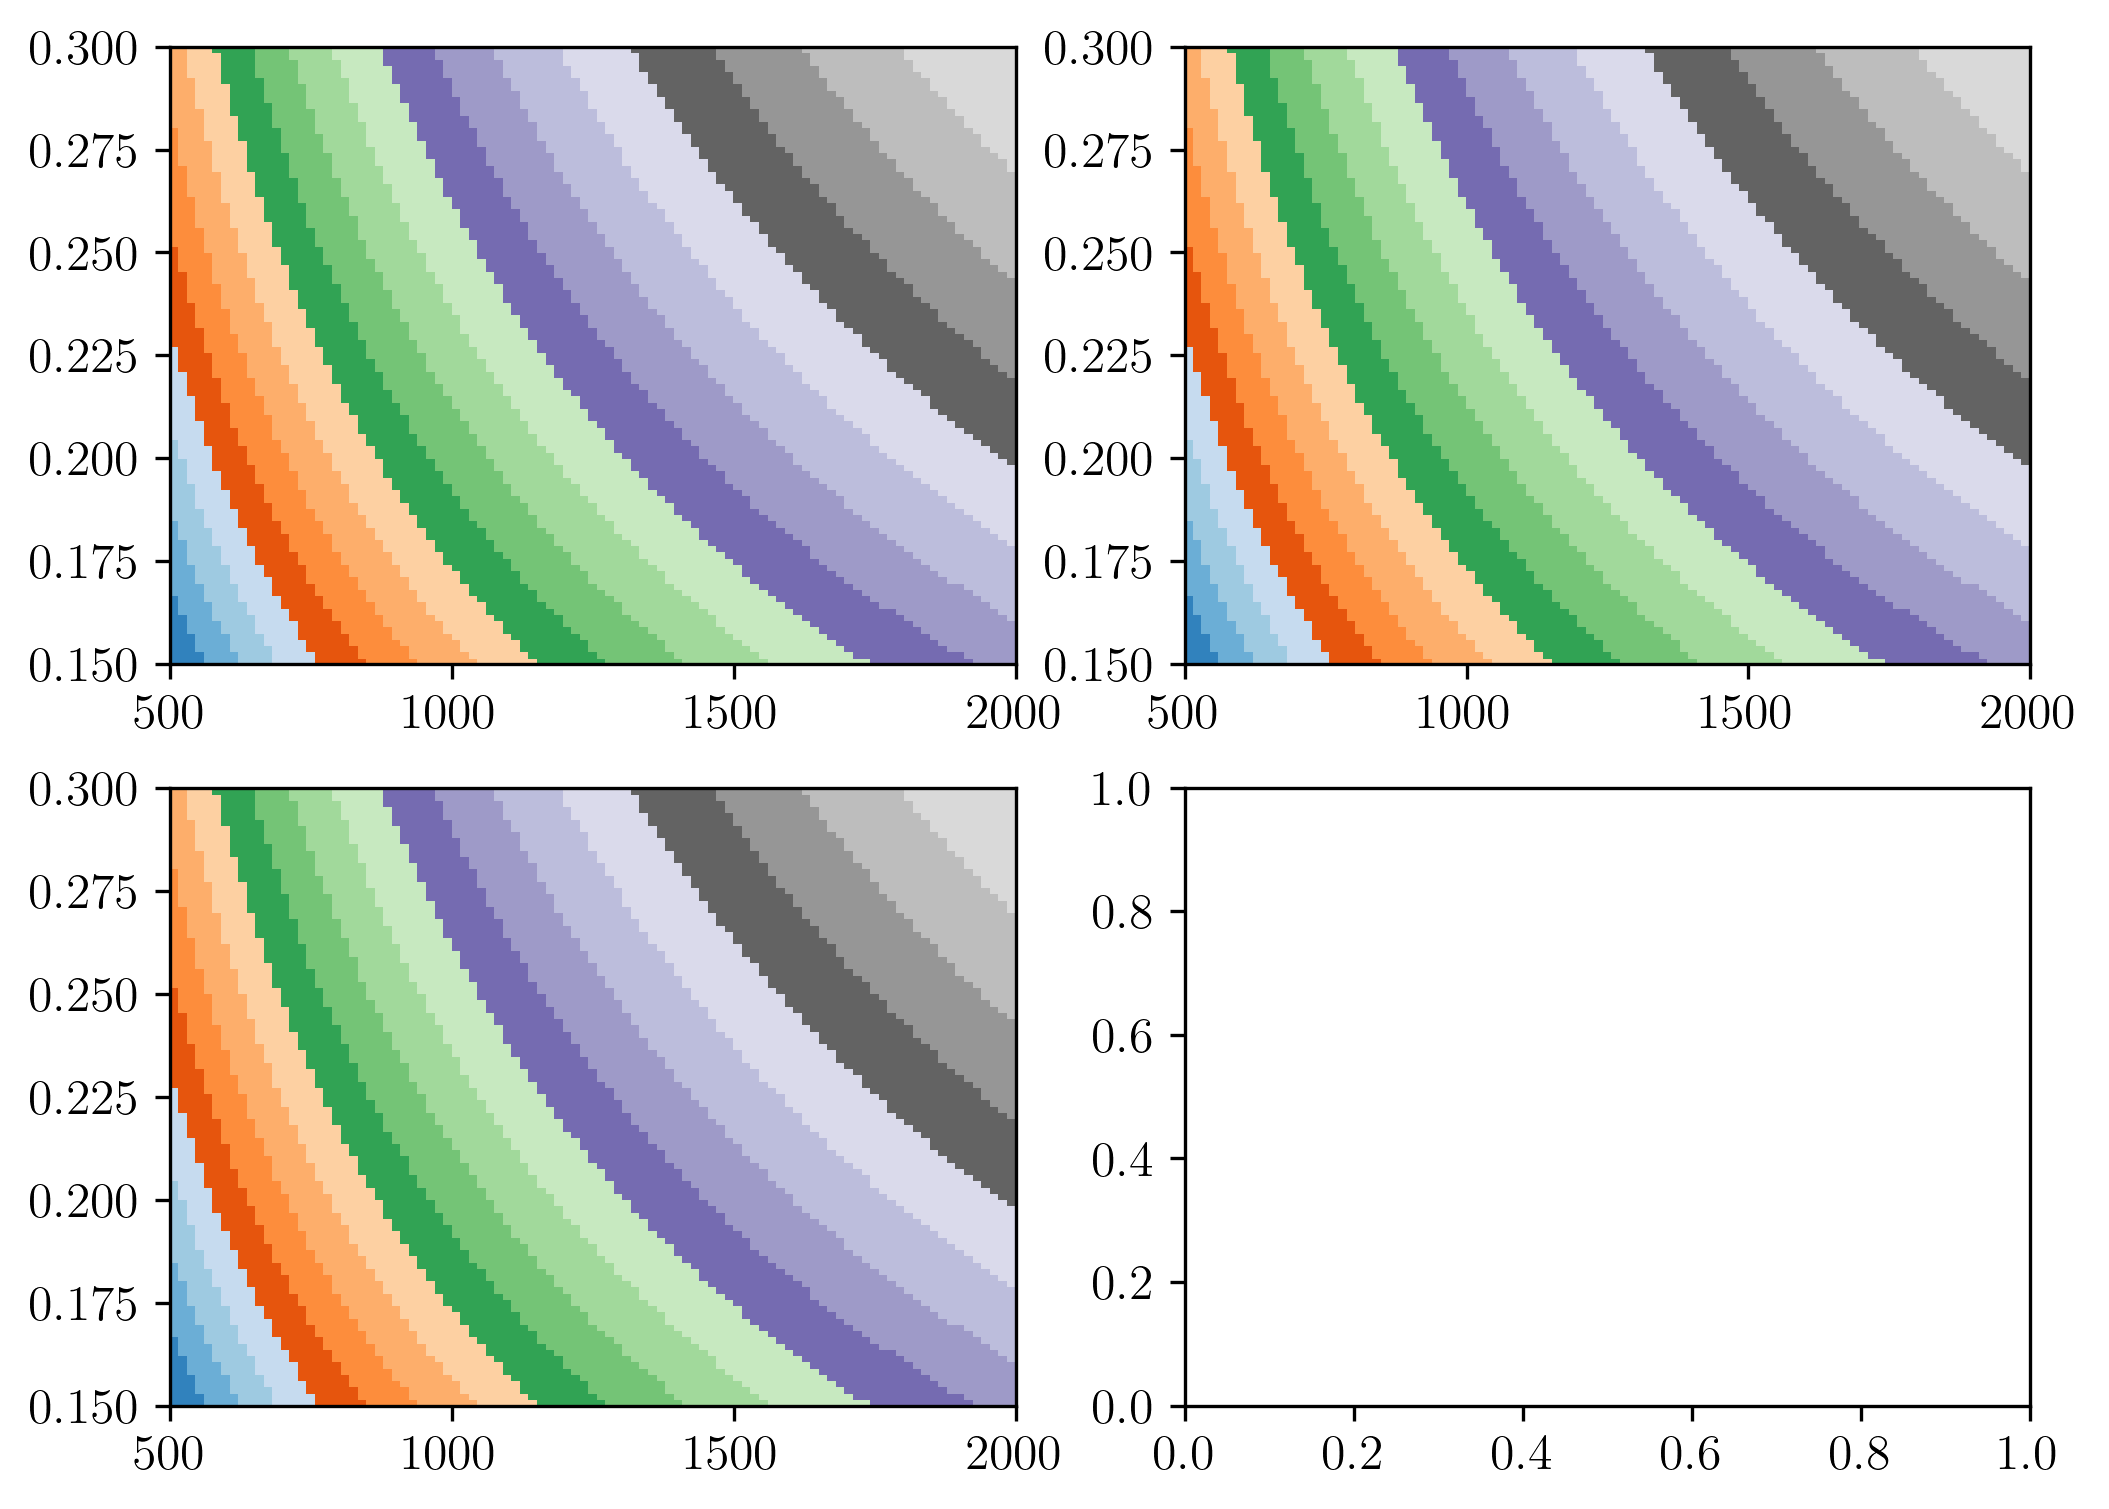

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), dpi=300)

# 2-photons
# Make data
# Singles
steps = 100
X_2 = np.linspace(500, 2000, steps)
X_4 = np.linspace(500, 2000, steps)
X_6 = np.linspace(500, 2000, steps)
X_8 = np.linspace(500, 2000, steps)

# C/S ratio
Y_2 = np.linspace(0.15, 0.30, steps)
Y_4 = np.linspace(0.15, 0.30, steps)
Y_6 = np.linspace(0.15, 0.30, steps)
Y_8 = np.linspace(0.15, 0.30, steps)

X_2, Y_2 = np.meshgrid(X_2, Y_2)
X_4, Y_4 = np.meshgrid(X_4, Y_4)
X_6, Y_6 = np.meshgrid(X_6, Y_6)
X_8, Y_8 = np.meshgrid(X_8, Y_8)

# N-photon rate per hour
Z = [[None],[None],[None],[None]]
Z[0] = ((X_2*1000*Y_2)/((80000000**0))) #for log scale
Z[1] = ((X_4*1000*Y_4)**2/(2*(80000000**1))) #for log scale
Z[2] = (((X_6*1000*Y_6)**3/(4*(80000000**2))*3600)) #for log scale
Z[3] = (((X_8*1000*Y_8)**4/(8*(80000000**3))*3600)) #for log scale
#Z = np.asarray(Z)
#Z = Z.astype(float) #for log scale
#print(Z.size())

#ax = ax.flatten()
im = [[None],[None],[None],[None]]
im[0] = ax[0,0].pcolormesh(X_2, Y_2, Z[0], norm=colors.LogNorm(), cmap=cm.tab20c)

im[1] = ax[0,1].pcolormesh(X_4, Y_4, Z[1], norm=colors.LogNorm(), cmap=cm.tab20c)

im[2] = ax[1,0].pcolormesh(X_6, Y_6, Z[2], norm=colors.LogNorm(), cmap=cm.tab20c)

im[3] = ax[1,1].pcolormesh(X_8, Y_8, Z[3], norm=colors.LogNorm(), cmap=cm.tab20c)

for i in range(2):
    for j in range(2):
        fig.colorbar(im[2**i+j], extend='both', shrink=0.9, ax=ax[i,j])

ax[0].title('8-photon coincidences [per hour]')
ax[0].xlabel('Singles [kHz]')
ax[0].ylabel('C/S ratio')